# Example of the usage of the allocation algorithm in the algorithm folder

In this notebook we explore how to use all the allocation algorithm implemented in the algorithm folder. The algorithm are the following:

- barman: algorithm described in https://arxiv.org/abs/1707.04731;
- brute_force: given an fair division problem instance compute all the EF1 and PO allocation;
- envy_cycle: implements the EnvyCycle Elimination algorithm, described in https://dl.acm.org/doi/10.1145/988772.988792;
- garg: algorithm described in https://arxiv.org/abs/2204.14229;
- generalized_adjusted_winner: implements a generalized adjusted winner procedure described in https://arxiv.org/abs/1807.10684;
- minmaxenvy_trade: implements a sequential mechanism, after adding one item in the pool, computes the minimax envy allocation that respect resource monotonicity;
- mnw: computes the allocation that maximize the Nash welfare, as it was proven working by https://dl.acm.org/doi/10.1145/3355902;
- round_robin: computes the round-robin procedure, that produced an EF1 allocaiton, explained in https://dl.acm.org/doi/10.1145/3355902. 


In [2]:
import numpy as np
from algorithms.barman import Barman
from algorithms.brute_force import BruteForce
from algorithms.envy_cycle import EnvyCycleElimination
from algorithms.garg import GargAlgorithm
from algorithms.generalized_adjusted_winner import GeneralizedAdjustedWinner
from algorithms.minmaxenvy_trade import MinimaxTrade
from algorithms import mnw
from algorithms.envy_balancing import EnvyBalancing
from algorithms import round_robin
from utils.utils import randint_valuation
from utils.visualization import bipartite_graph_visualization




## Initialize number of agents, number of goods, and valuation range

In [3]:
n = 3
m = 20
valuation_range = np.array([1, 21])

## 2 Agent Scenario

### Generalized Agjusted-Winner

Valuation profile: 
 [[ 5  1 17  4 13 17 19 10  2  5 18  5 18 17  1 15 17 17  3  5]
 [ 9 16 12  7  9 20  1 10 11  6 12  2  5  9  1 17  6  2  5 17]]
Generalized Adjusted Winner: 
 [[0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0]
 [1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1]]


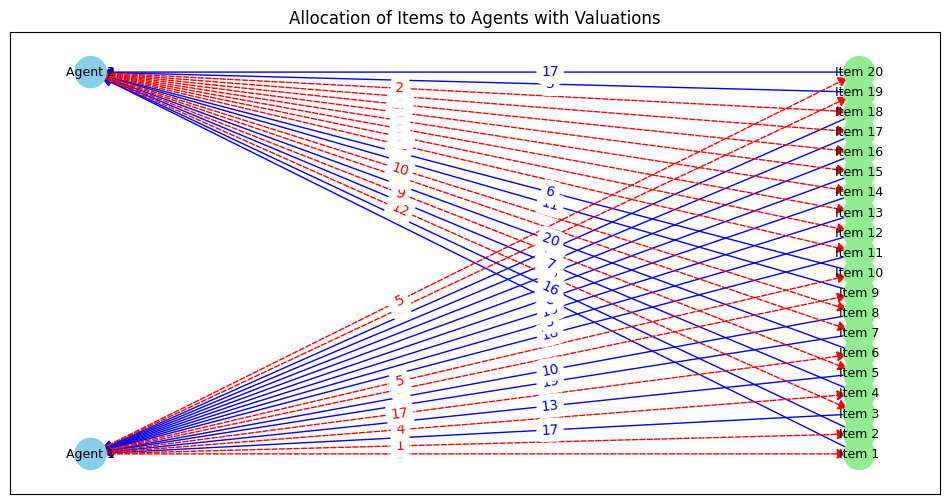

Generalized Adjusted Winner: 
 [[0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0]
 [1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 1 1]]


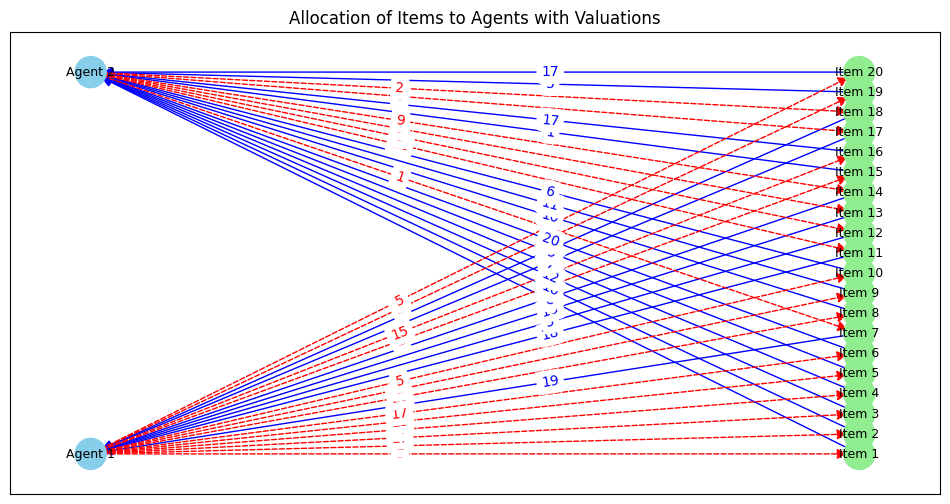

In [4]:
valuation_profile = randint_valuation(2, m, valuation_range)
print("Valuation profile: \n", valuation_profile)
gen_aw = GeneralizedAdjustedWinner(valuation_profile)
allocations = gen_aw.get_allocation()
for allocation in allocations:
    print("Generalized Adjusted Winner: \n", allocation)
    bipartite_graph_visualization(2, m, valuation_profile, allocation)

### Envy Balancing

Envy balancing allocation: 
 [[1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1]
 [0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0]]


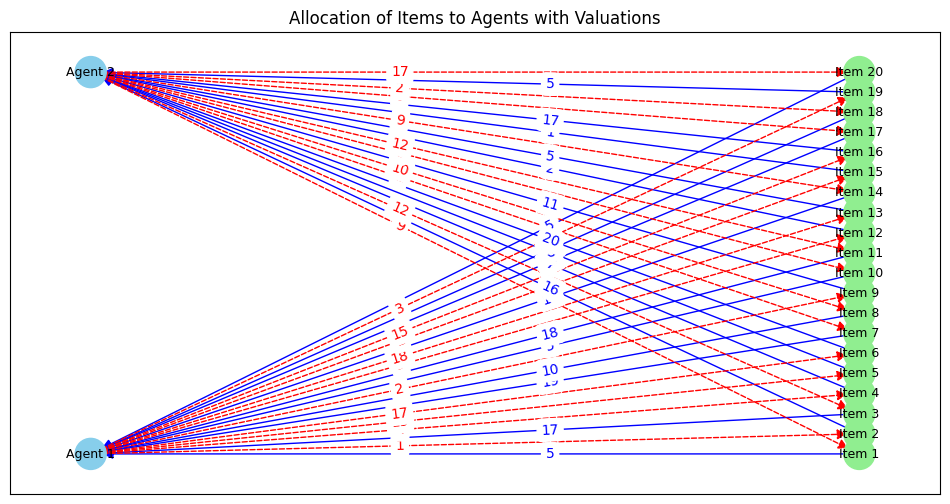

In [5]:
trade_algorithm = EnvyBalancing(valuation_profile)
allocation = trade_algorithm.run_algorithm()

print("Envy balancing allocation: \n", allocation)
bipartite_graph_visualization(2, m, valuation_profile, allocation)

### Minimax Trade

Minimax trade allocation: 
 [[0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0]
 [1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1]]


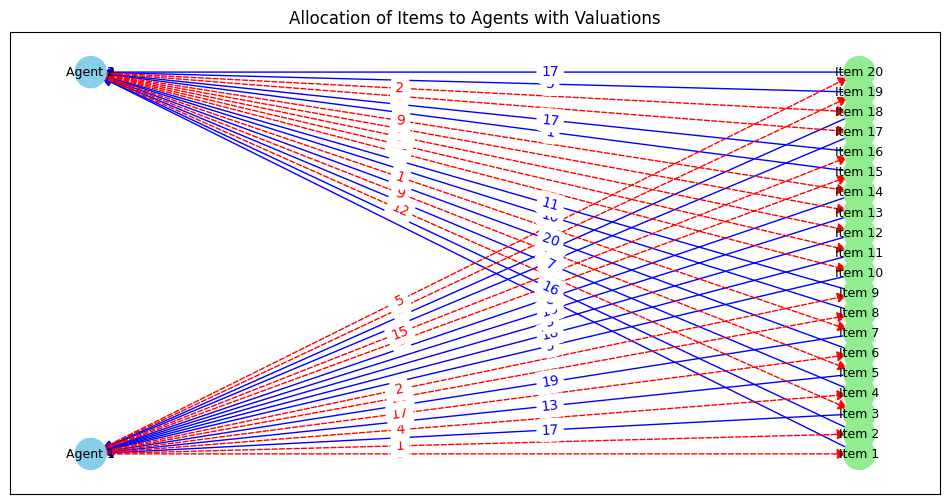

Time:  32.33465313911438


In [6]:
import cProfile

import time
start = time.time()
minimax_trade = MinimaxTrade(2, m, valuation_profile)
allocation = minimax_trade.minimax_trade()
print("Minimax trade allocation: \n", allocation)
bipartite_graph_visualization(2, m, valuation_profile, allocation)
print("Time: ", time.time() - start)

## General Case

### Generate a random valuation for n agents

In [7]:
n = 3
m = 6
valuation_range = np.array([1, 21])
valuation_profile = randint_valuation(n, m, valuation_range)

print(f"Valuation Profile:\n{valuation_profile}")

Valuation Profile:
[[10  7  9  7 15  3]
 [15  7 17  2  5  2]
 [19  4 10 12  6  5]]


### Round-Robin procedure

Round robin allocation: 
 [[0 0 0 1 1 0]
 [0 1 1 0 0 0]
 [1 0 0 0 0 1]]


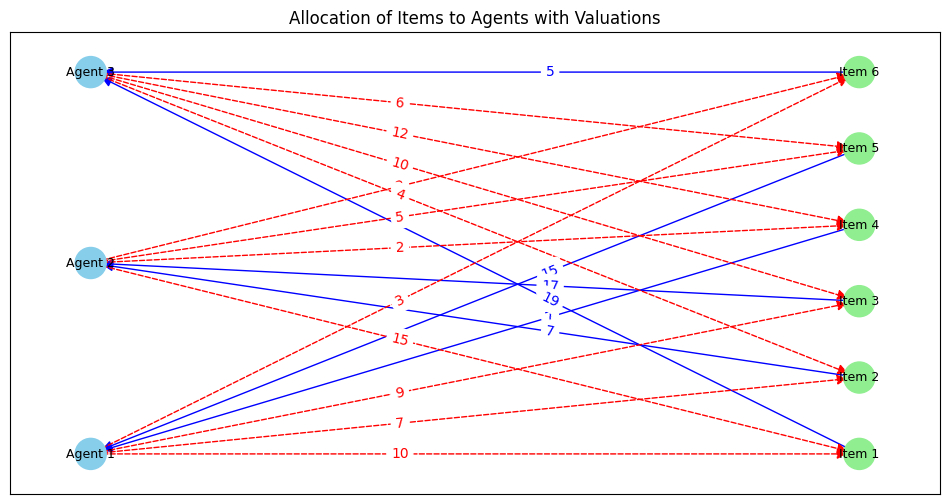

In [8]:
allocation = round_robin.round_robin_allocation(n, m, valuation_profile)
print("Round robin allocation: \n", allocation)
bipartite_graph_visualization(n, m, valuation_profile, allocation)

### EnvyCycle Elimination algorithm

Envy cycle elimination allocation: 
 [[0 1 0 1 1 0]
 [0 0 1 0 0 1]
 [1 0 0 0 0 0]]


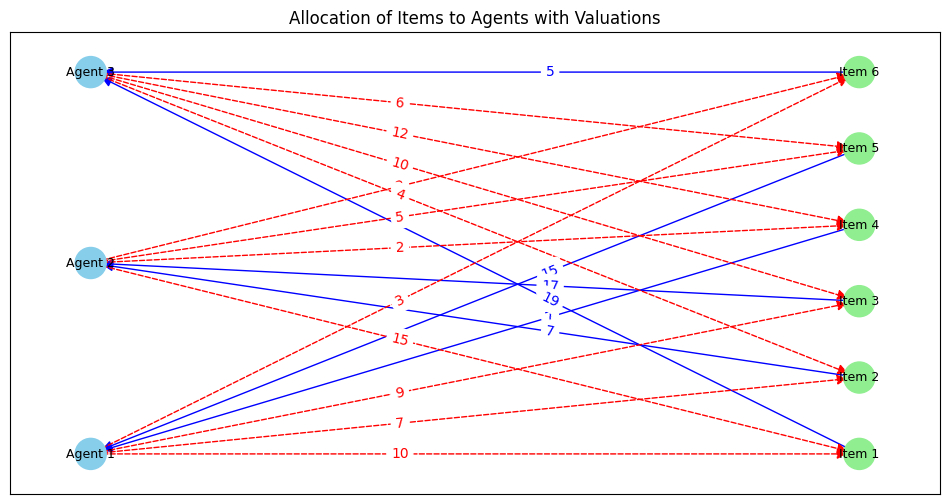

In [9]:
envycycle = EnvyCycleElimination(n, m, valuation_profile)
envycycle_allocation = envycycle.envy_cycle_elimination()
print("Envy cycle elimination allocation: \n", envycycle_allocation)
bipartite_graph_visualization(n, m, valuation_profile, allocation)

### MNW

Maximum Nash welfare allocation: 
 [[0 1 0 0 1 0]
 [0 0 1 0 0 0]
 [1 0 0 1 0 1]]


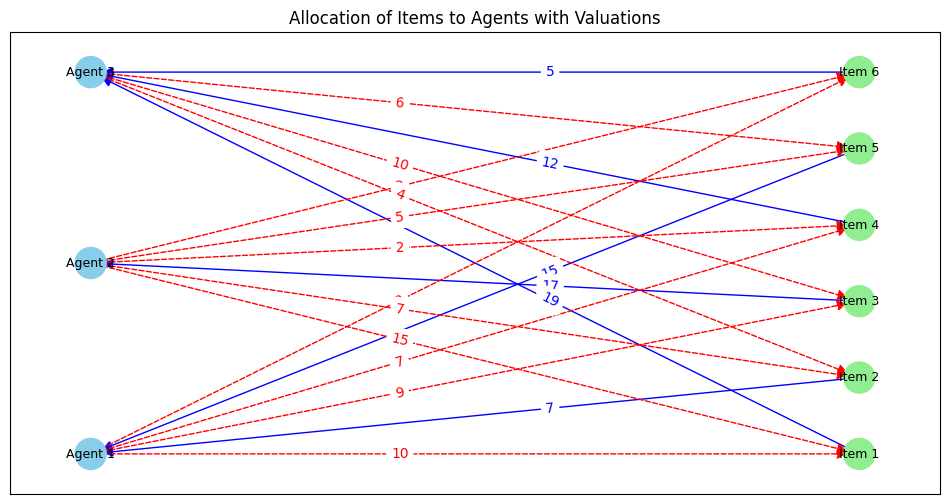

Maximum Nash welfare allocation: 
 [[0 1 0 0 1 0]
 [0 0 1 0 0 0]
 [1 0 0 1 0 1]]


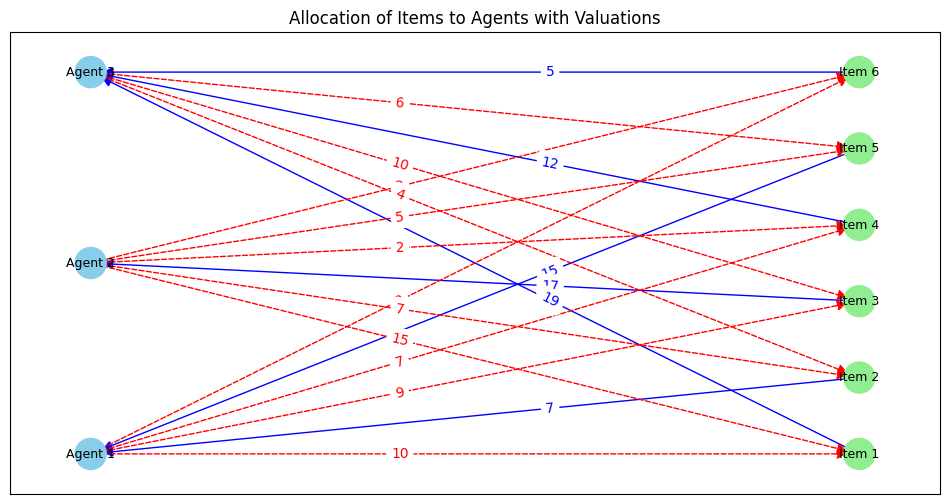

In [10]:
allocations = mnw.maximize_nash_welfare_bruteforce(n, m, valuation_profile)

for allocation in allocations:
    print("Maximum Nash welfare allocation: \n", allocation)
    bipartite_graph_visualization(n, m, valuation_profile, allocation)

Maximum Nash welfare allocation: 
 [[0 1 0 0 1 0]
 [0 0 1 0 0 0]
 [1 0 0 1 0 1]]


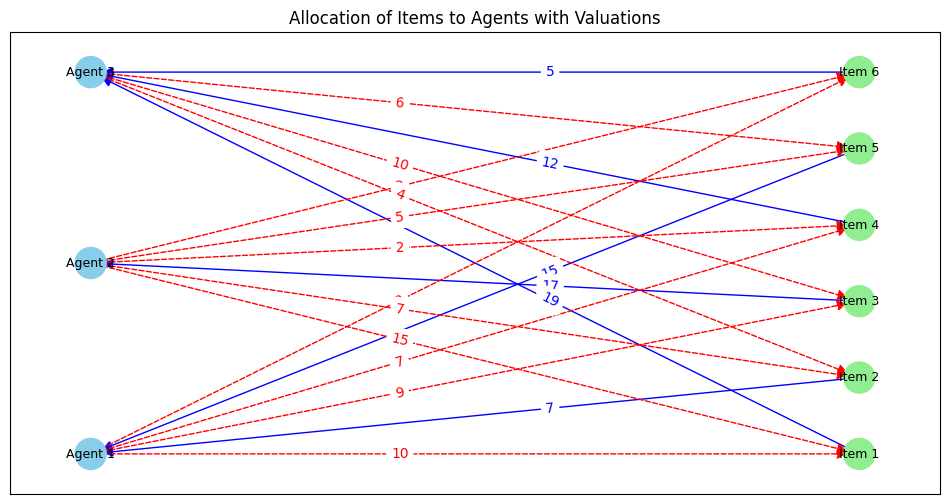

In [11]:
allocation = mnw.maximize_nash_welfare_nl(n, m, valuation_profile)

print("Maximum Nash welfare allocation: \n", allocation)
bipartite_graph_visualization(n, m, valuation_profile, allocation)

Restricted license - for non-production use only - expires 2025-11-24
Maximum Nash welfare allocation: 
 [[0 1 0 0 1 0]
 [0 0 1 0 0 0]
 [1 0 0 1 0 1]]


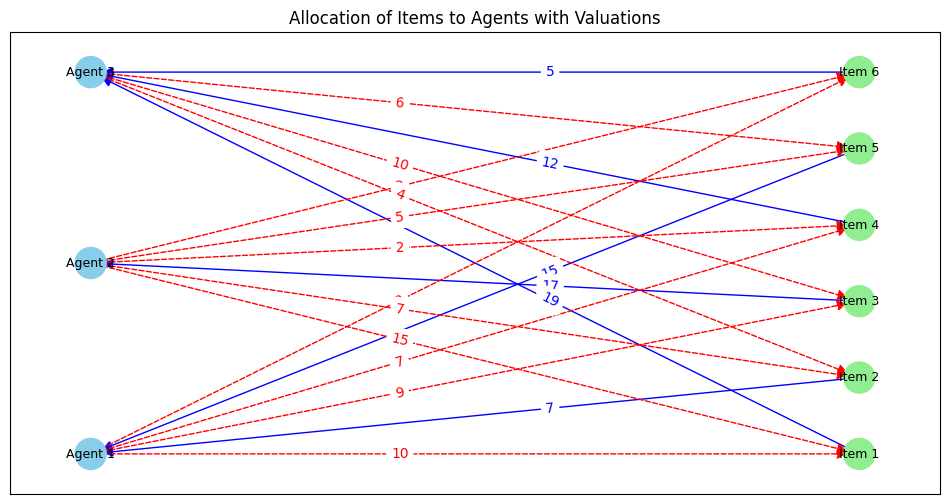

In [12]:
allocation = mnw.maximize_nash_welfare_milp(n, m, valuation_profile)

print("Maximum Nash welfare allocation: \n", allocation)
bipartite_graph_visualization(n, m, valuation_profile, allocation)

### Barman

Barman allocation: 
 [[0 1 0 0 1 0]
 [0 0 1 0 0 0]
 [1 0 0 1 0 1]]


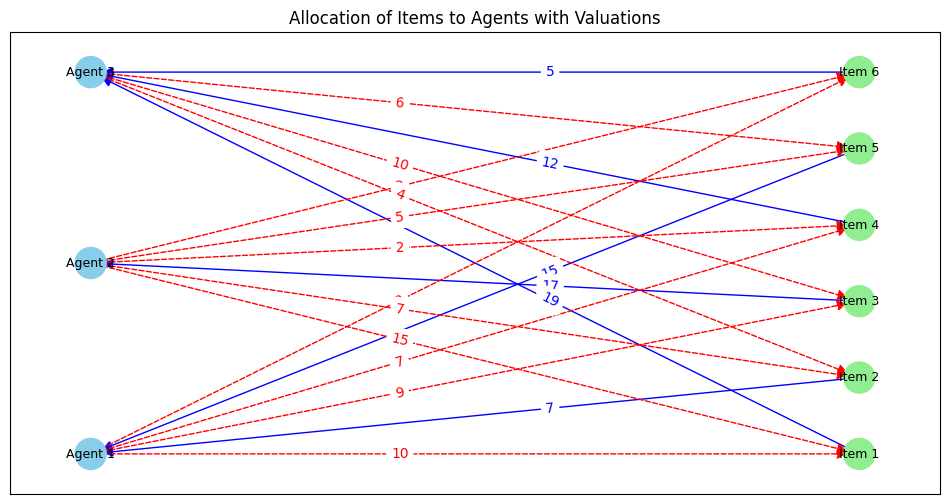

In [13]:
barman = Barman(n, m, valuation_profile)
allocation, price = barman.run_algorithm()

print("Barman allocation: \n", allocation)
bipartite_graph_visualization(n, m, valuation_profile, allocation)

### Garg

Garg allocation: 
 [[0 1 0 0 1 0]
 [0 0 1 0 0 0]
 [1 0 0 1 0 1]]


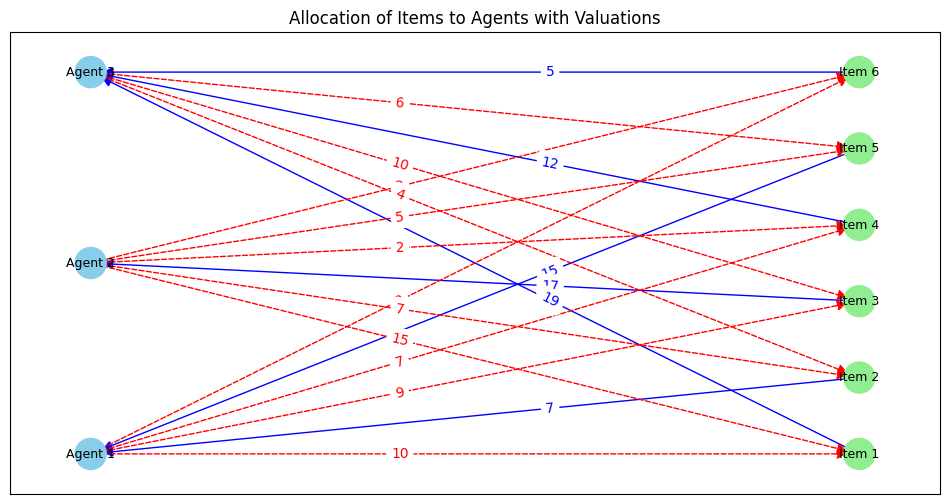

In [14]:
garg = GargAlgorithm(n, m, valuation_profile)   
allocation, price = garg.run_algorithm()
print("Garg allocation: \n", allocation)
bipartite_graph_visualization(n, m, valuation_profile, allocation)

### Brute Force

Brute force allocation: 
 [[0 0 0 0 1 0]
 [1 0 1 0 0 0]
 [0 1 0 1 0 1]]


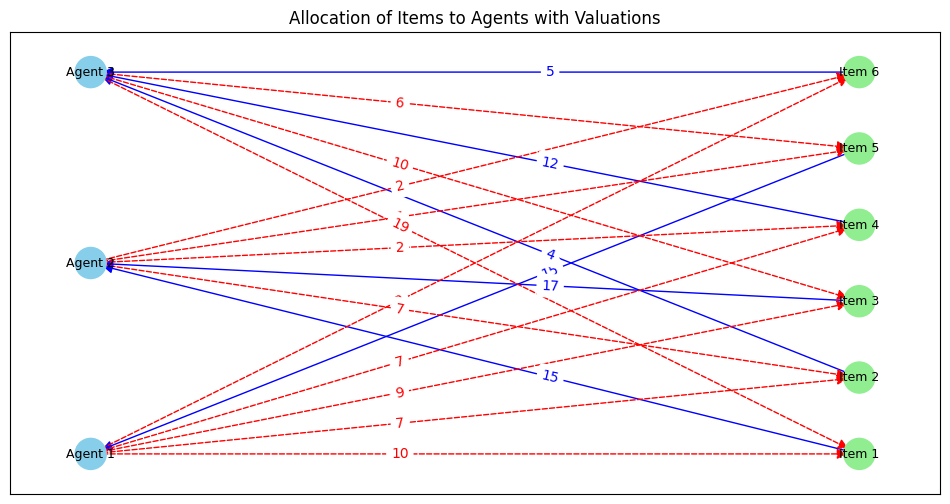

Brute force allocation: 
 [[0 0 0 0 1 0]
 [0 1 1 0 0 0]
 [1 0 0 1 0 1]]


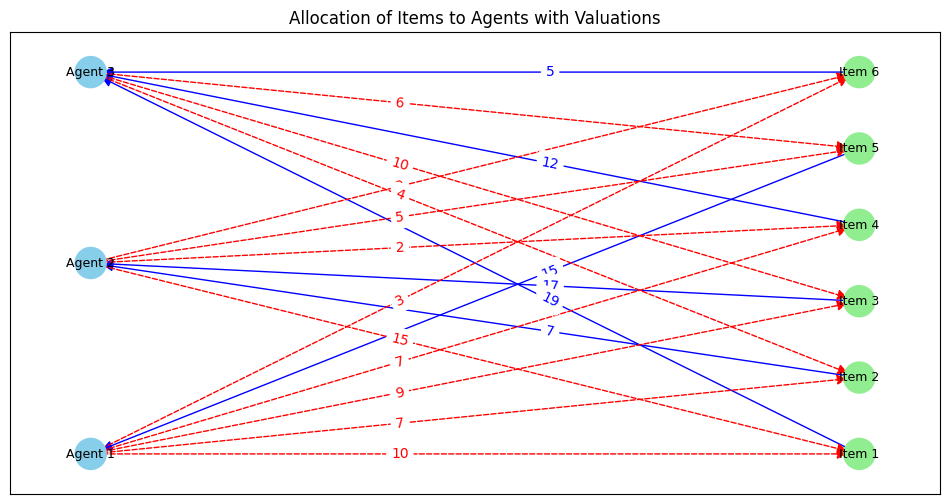

Brute force allocation: 
 [[0 0 0 0 1 0]
 [0 1 1 0 0 1]
 [1 0 0 1 0 0]]


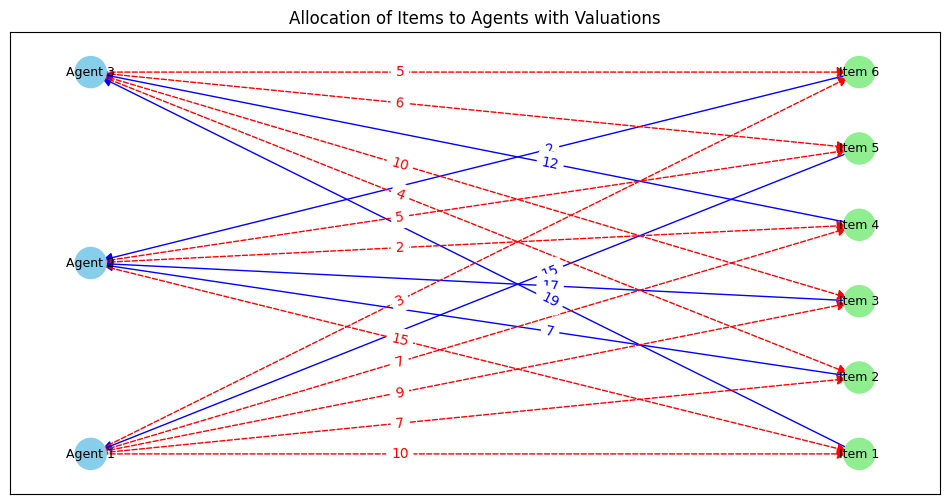

Brute force allocation: 
 [[0 1 0 0 1 0]
 [0 0 1 0 0 0]
 [1 0 0 1 0 1]]


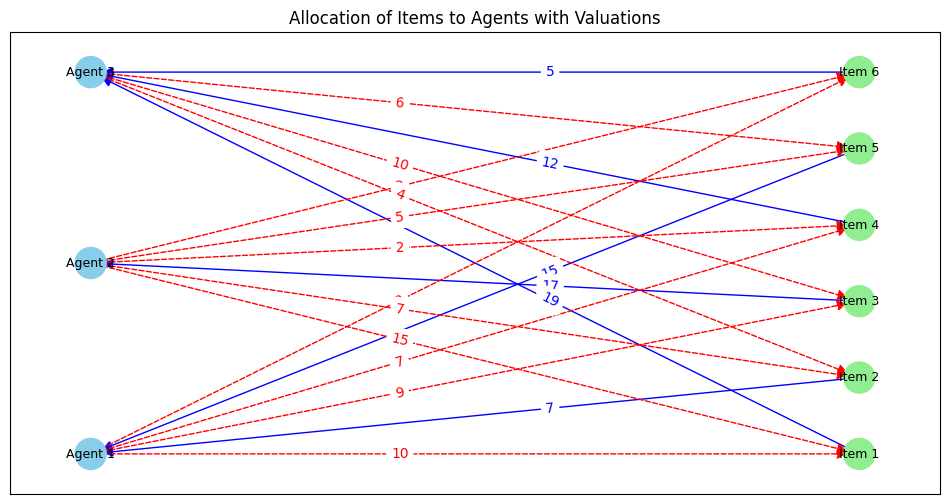

Brute force allocation: 
 [[0 0 1 0 1 0]
 [0 1 0 0 0 0]
 [1 0 0 1 0 1]]


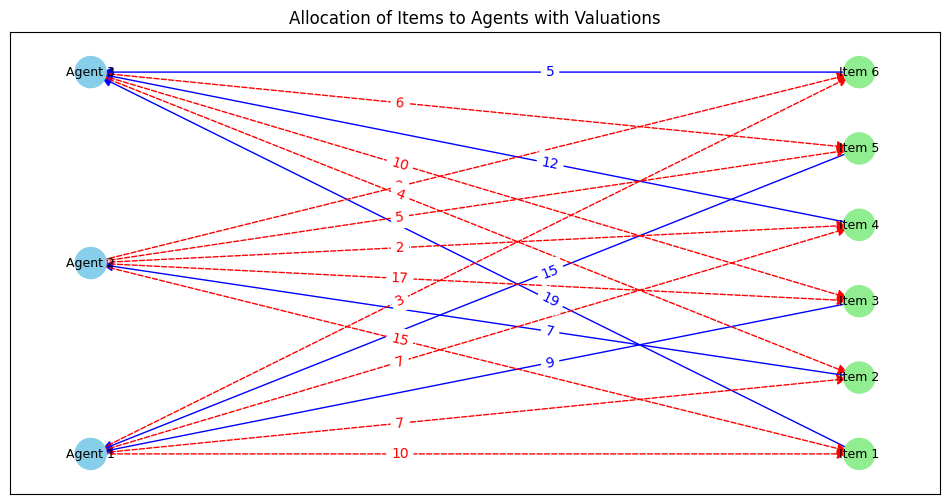

Brute force allocation: 
 [[0 1 0 0 1 0]
 [1 0 1 0 0 0]
 [0 0 0 1 0 1]]


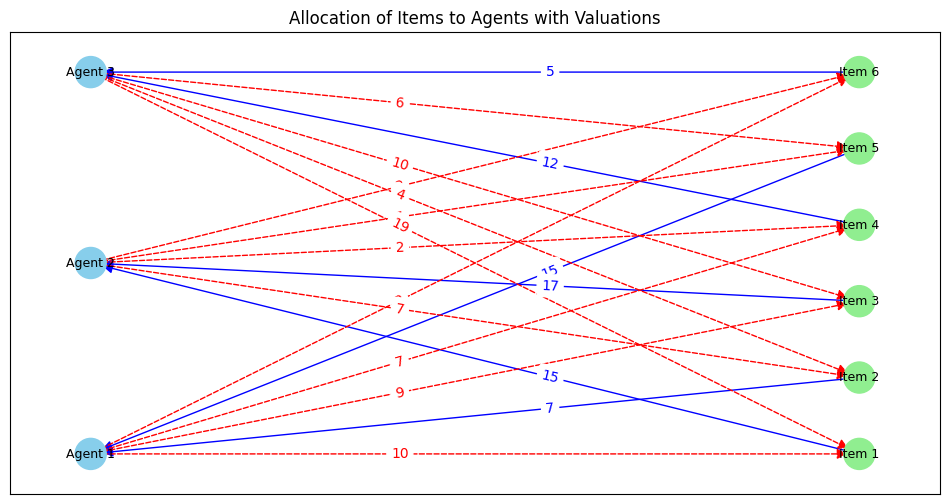

Brute force allocation: 
 [[0 1 0 0 1 0]
 [0 0 1 0 0 1]
 [1 0 0 1 0 0]]


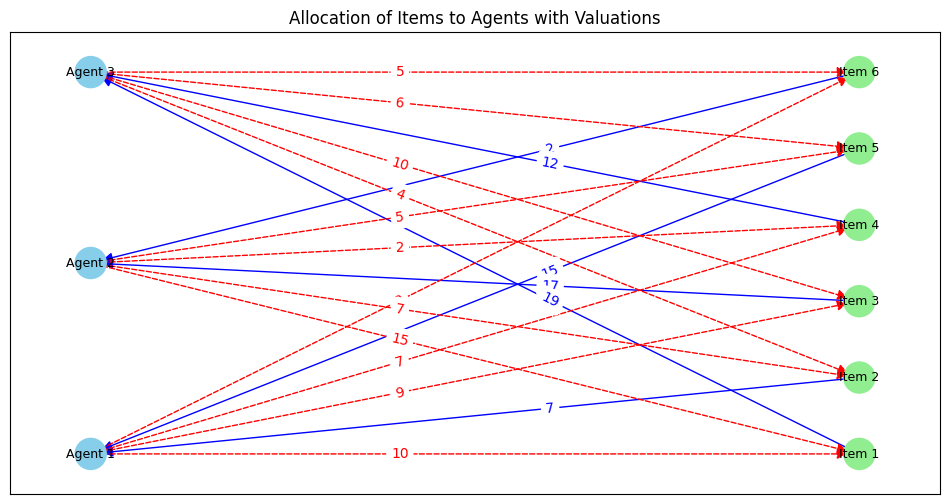

Brute force allocation: 
 [[0 0 0 1 1 0]
 [0 1 1 0 0 0]
 [1 0 0 0 0 1]]


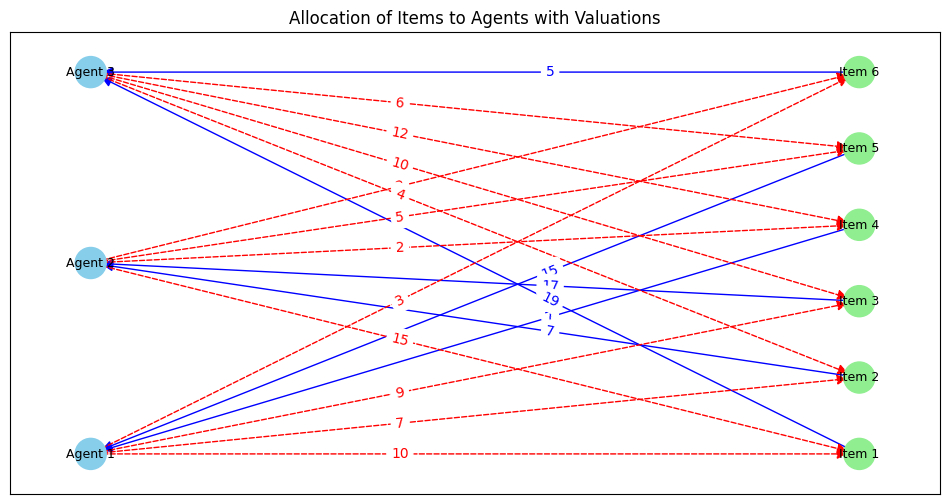

Brute force allocation: 
 [[0 0 0 0 1 1]
 [0 1 1 0 0 0]
 [1 0 0 1 0 0]]


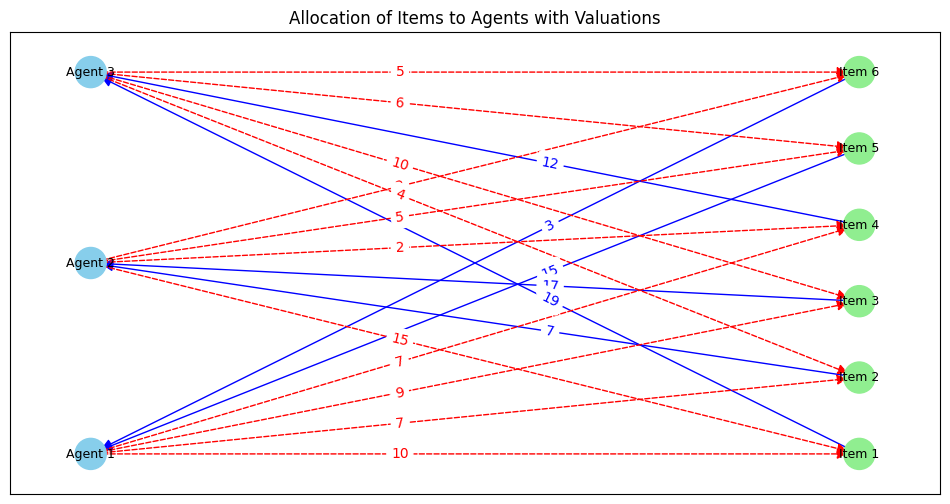

Brute force allocation: 
 [[0 0 0 1 1 0]
 [0 1 1 0 0 1]
 [1 0 0 0 0 0]]


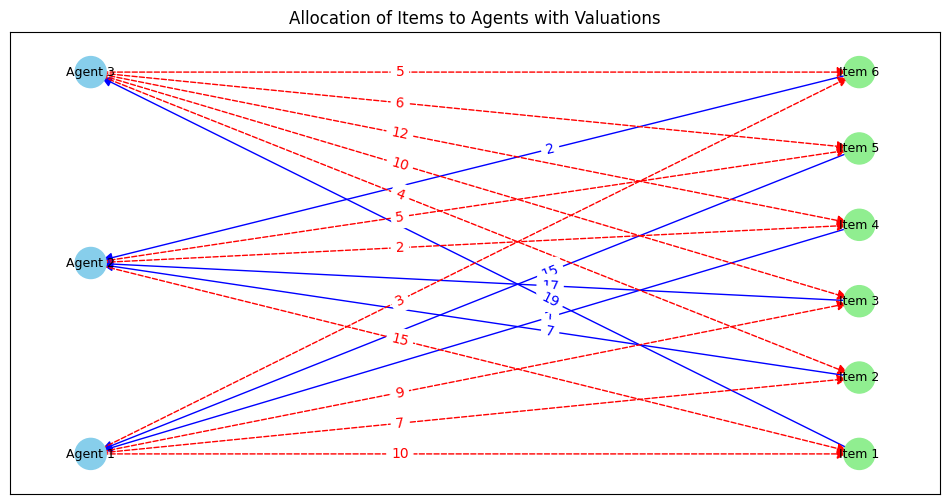

Brute force allocation: 
 [[0 1 0 1 1 0]
 [0 0 1 0 0 0]
 [1 0 0 0 0 1]]


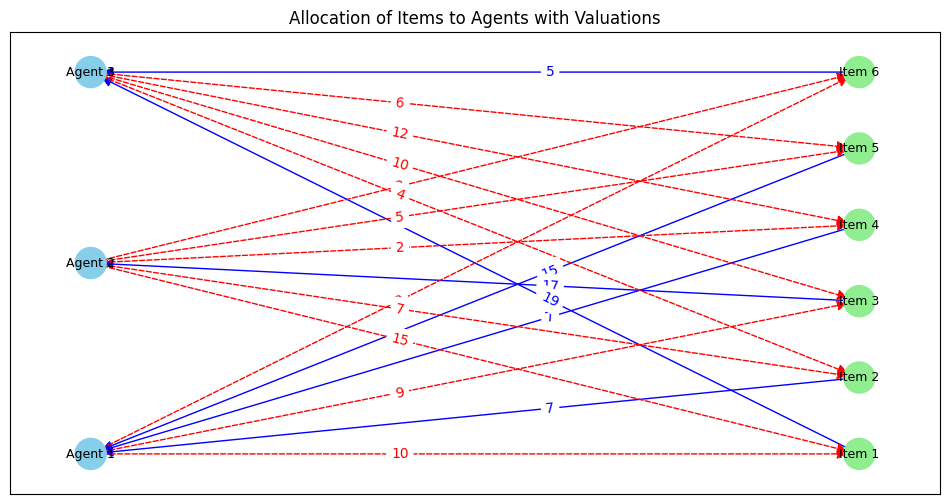

Brute force allocation: 
 [[0 1 0 0 1 1]
 [0 0 1 0 0 0]
 [1 0 0 1 0 0]]


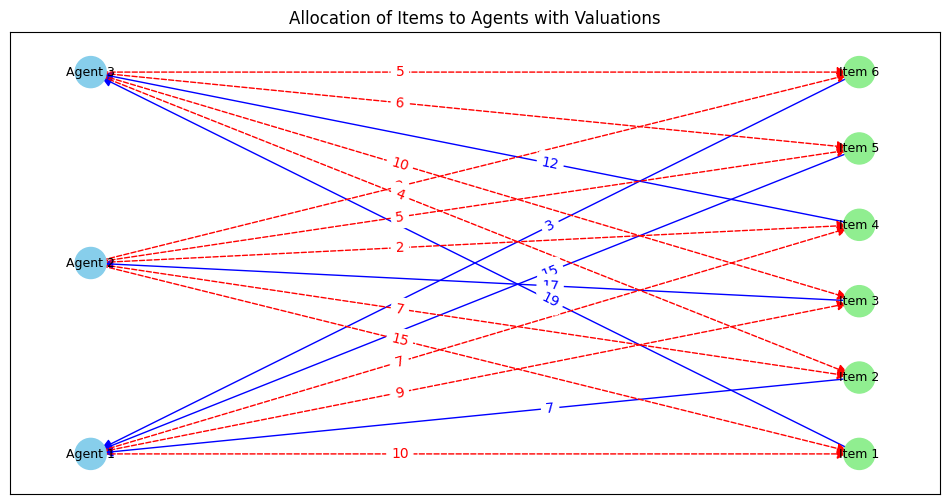

Brute force allocation: 
 [[0 0 1 1 1 0]
 [0 1 0 0 0 0]
 [1 0 0 0 0 1]]


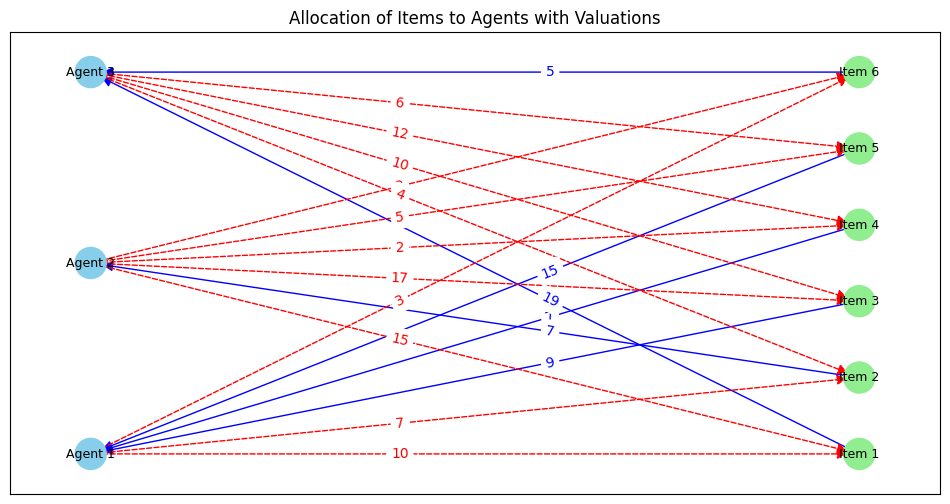

Brute force allocation: 
 [[0 0 1 0 1 1]
 [0 1 0 0 0 0]
 [1 0 0 1 0 0]]


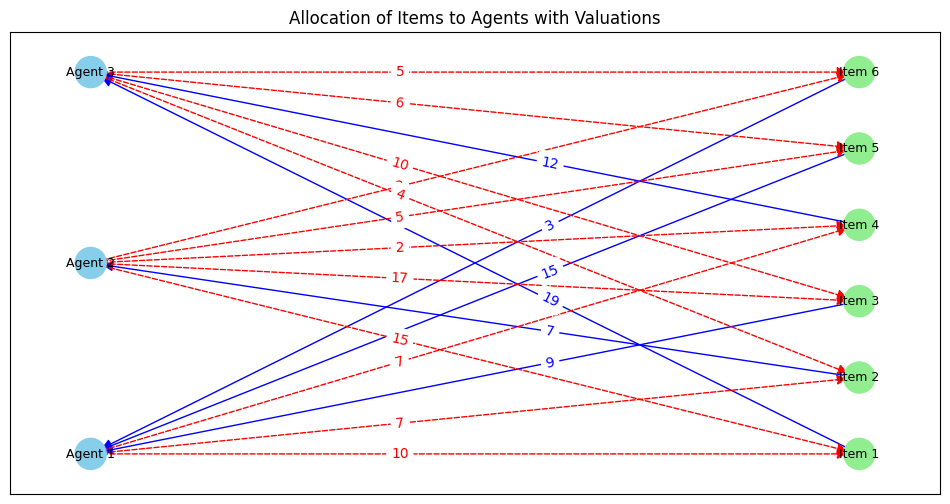

Brute force allocation: 
 [[1 1 0 0 1 0]
 [0 0 1 0 0 1]
 [0 0 0 1 0 0]]


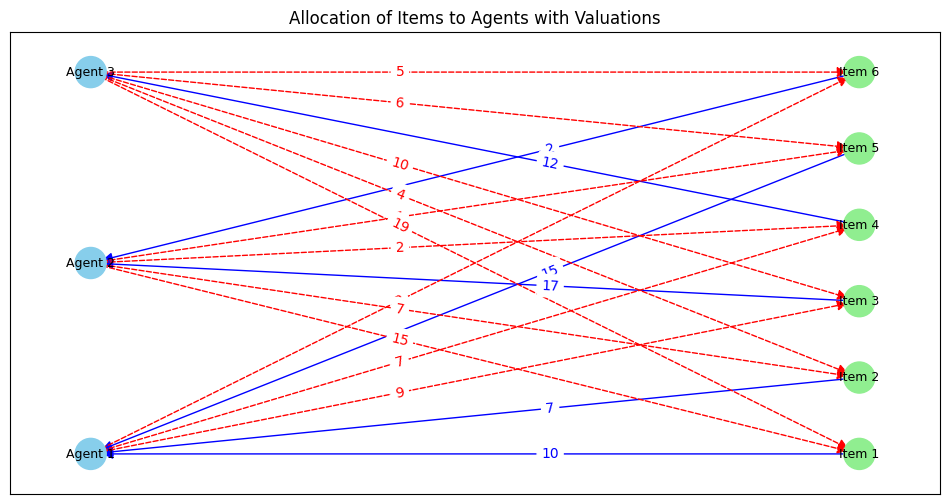

Brute force allocation: 
 [[1 0 0 0 1 1]
 [0 1 1 0 0 0]
 [0 0 0 1 0 0]]


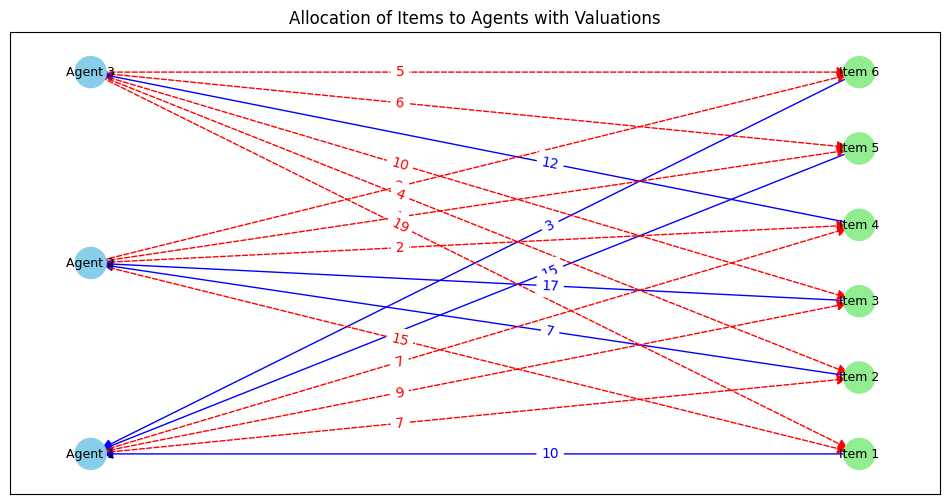

Brute force allocation: 
 [[0 1 0 1 1 0]
 [0 0 1 0 0 1]
 [1 0 0 0 0 0]]


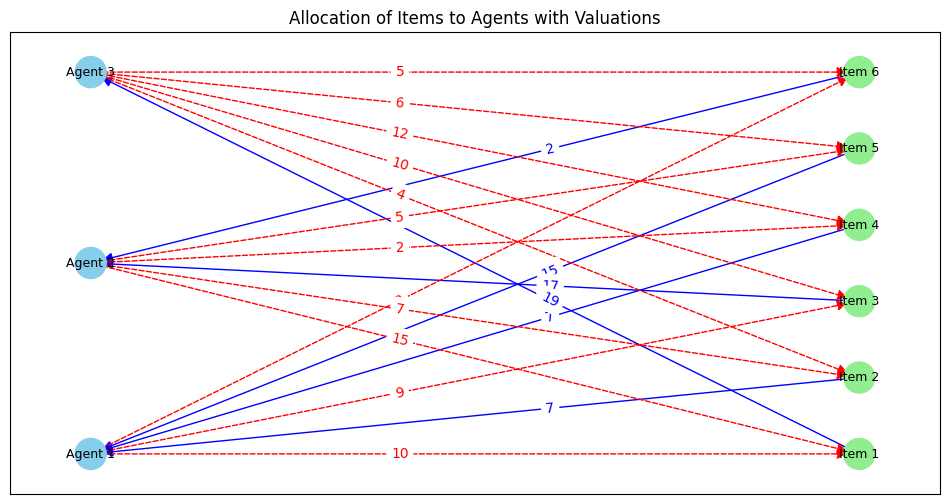

Brute force allocation: 
 [[0 1 0 0 1 1]
 [1 0 1 0 0 0]
 [0 0 0 1 0 0]]


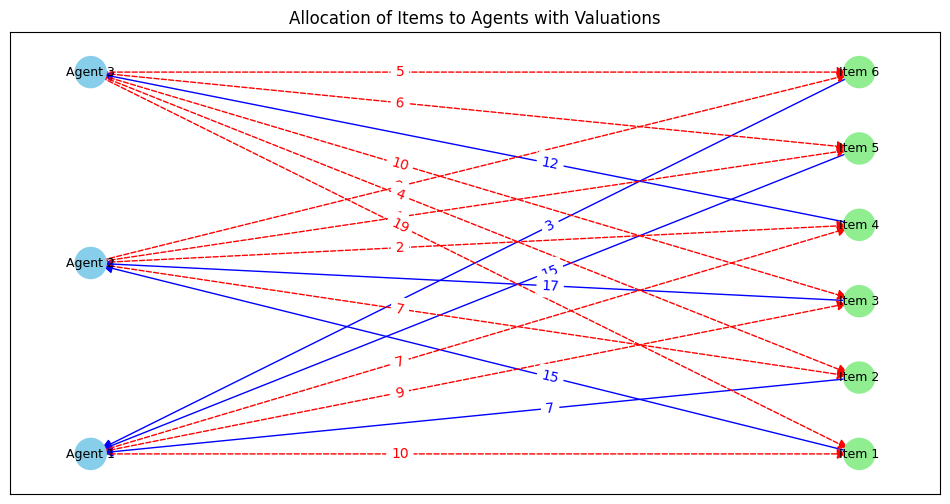

Brute force allocation: 
 [[0 0 0 1 1 1]
 [0 1 1 0 0 0]
 [1 0 0 0 0 0]]


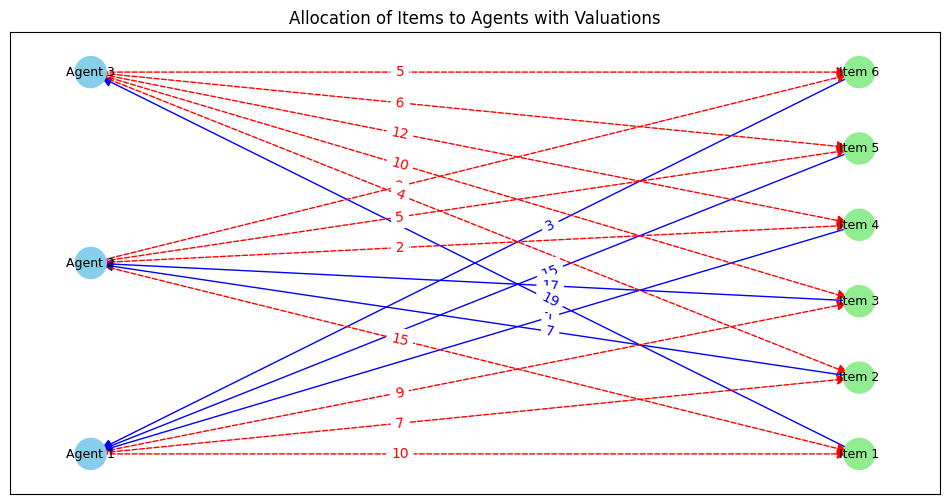

Brute force allocation: 
 [[0 1 0 1 1 1]
 [0 0 1 0 0 0]
 [1 0 0 0 0 0]]


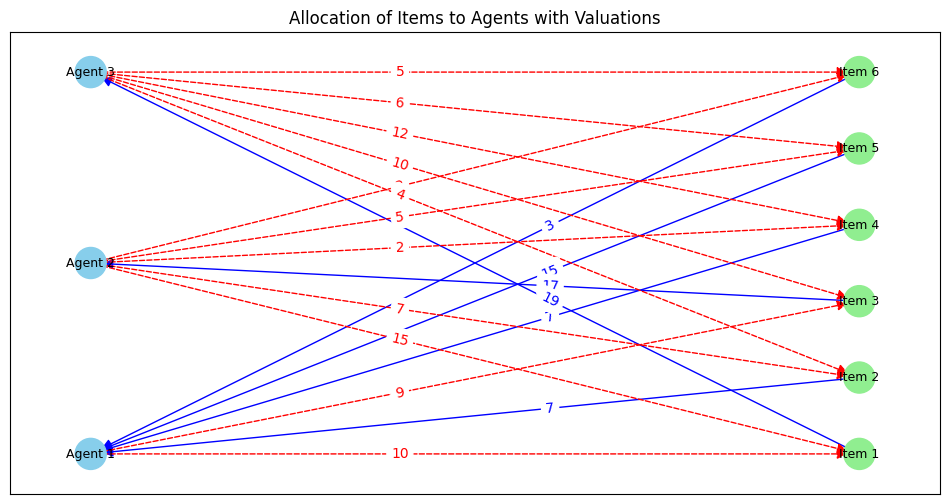

In [15]:
brute_force = BruteForce(n, m, valuation_profile)
allocations = brute_force.compute_ef1_and_po_allocations()
for allocation in allocations:
    print("Brute force allocation: \n", allocation)
    bipartite_graph_visualization(n, m, valuation_profile, allocation)